# The Greatest NBA Season of All Time 

<span style="font-size:15px;">Description: We want to determine which NBA player had the greatest season of all time. This will be a comprehensive breakdown on player analytics, incorporating aspects of quantitative and qualitative analysis, as well as personal judgement. The core of the analysis will be demonstrated through visualization techniques learned from lectures and other sources.</span>

<span style="font-size:15px;">Contributors: Brandon, Brayden</span>


# Imports 

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklm
from sklearn import preprocessing

# Cleaning the Dataset  

In [130]:
# Import the dataset and skip the first row 
URL="https://raw.githubusercontent.com/BrandonYChan/Data-Visualization-Project/main/MVP.csv"
MVP= pd.read_csv(URL, skiprows=1, skipfooter=1)
#source: basketballreference.com (Added to our GitHub) 

# Remove unnecessary columns
MVP.drop(columns=['-9999', 'Voting', 'Lg'], inplace=True)

# Regex to split the season into start and end date 
MVP['Keys']=MVP['Player'].str.split(' ', n=1, expand=True).iloc[:,1]
MVP['Keys']=MVP['Keys'] + ' ' + MVP['Season'].apply(lambda x:x[-2:]) + "'"
MVP.set_index(MVP['Keys'], inplace=True)

MVP

C:\Users\bchan\AppData\Local\Temp\ipykernel_228\3415725969.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  MVP= pd.read_csv(URL, skiprows=1, skipfooter=1)


,Season,Player,Age,Tm,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Keys
Keys,,,,,,,,,,,,,,,,,
Embiid 23',2022-23,Joel Embiid,28,PHI,66,34.6,33.1,10.2,4.2,1.0,1.7,0.548,0.330,0.857,12.3,0.259,Embiid 23'
Jokić 22',2021-22,Nikola Jokić,26,DEN,74,33.5,27.1,13.8,7.9,1.5,0.9,0.583,0.337,0.810,15.2,0.296,Jokić 22'
Jokić 21',2020-21,Nikola Jokić,25,DEN,72,34.6,26.4,10.8,8.3,1.3,0.7,0.566,0.388,0.868,15.6,0.301,Jokić 21'
Antetokounmpo 20',2019-20,Giannis Antetokounmpo,25,MIL,63,30.4,29.5,13.6,5.6,1.0,1.0,0.553,0.304,0.633,11.1,0.279,Antetokounmpo 20'
Antetokounmpo 19',2018-19,Giannis Antetokounmpo,24,MIL,72,32.8,27.7,12.5,5.9,1.3,1.5,0.578,0.256,0.729,14.4,0.292,Antetokounmpo 19'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chamberlain 60',1959-60,Wilt Chamberlain,23,PHW,72,46.4,37.6,27.0,2.3,NaN,NaN,0.461,NaN,0.582,17.0,0.245,Chamberlain 60'
Pettit 59',1958-59,Bob Pettit,26,STL,72,39.9,29.2,16.4,3.1,NaN,NaN,0.438,NaN,0.759,14.8,0.246,Pettit 59'
Russell 58',1957-58,Bill Russell,23,BOS,69,38.3,16.6,22.7,2.9,NaN,NaN,0.442,NaN,0.519,11.3,0.206,Russell 58'


# Setting the Criteria

Several categories will be considered before determining which player had the greatest season of all time. Key players with positive outlier statistics wil be added to the contenders list, and the final selection will be made from the contenders. 

In [151]:
contenders=[]

# Best Scorers

Mean points: 26.188235294117643
Standard deviation for points: 5.1490013141260675
Number of top scorers: 11


Text(0.5, 1.0, 'Top Scorers Points Per Game')

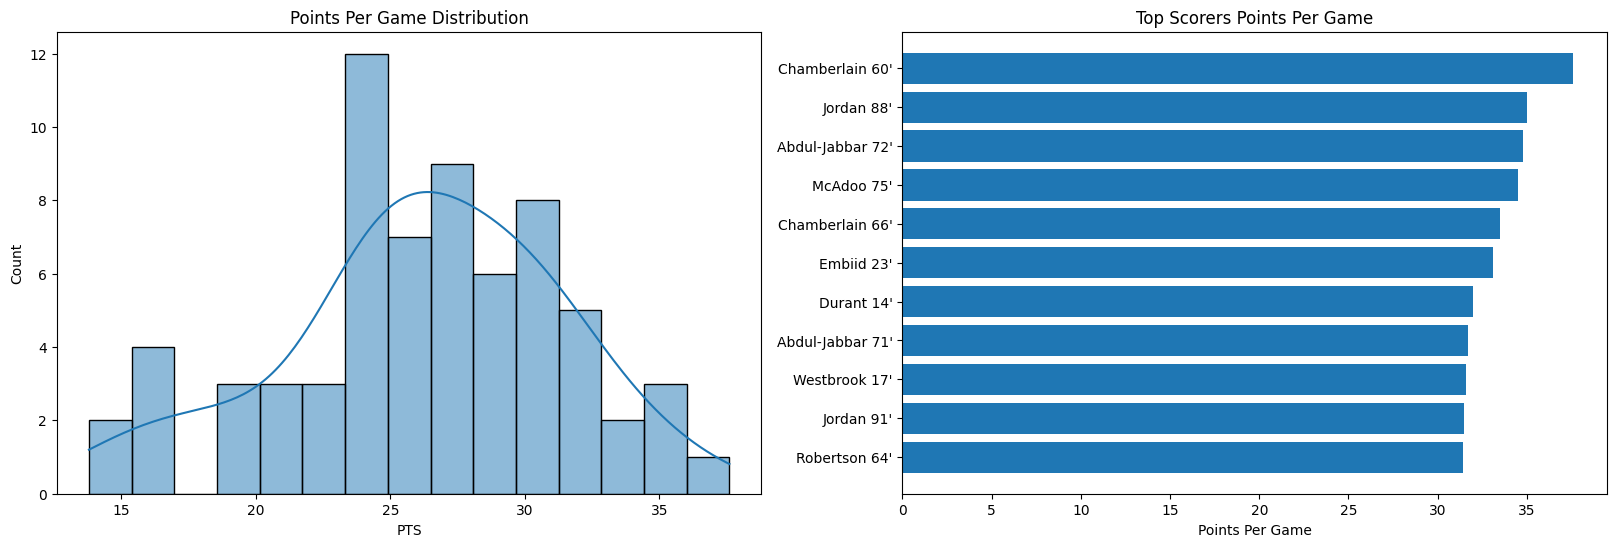

In [136]:
# Create axes for plots
fig, ax=plt.subplots(ncols=2,figsize=(20, 6))

# Descriptive statistics for scoring
mean_pts = np.mean(MVP['PTS'])
sd_pts = np.std(MVP['PTS'])
print(f'Mean points: {mean_pts}\nStandard deviation for points: {sd_pts}')

# Scoring distribution
sns.histplot(MVP['PTS'], kde=True, bins=15, ax=ax[0])
ax[0].set_title("Points Per Game Distribution")

# Filtering data to only include elite scorers (>1 sd from the mean) 
top_scorers = MVP[MVP['PTS'] > (mean_pts + sd_pts)].sort_values(by='PTS',ascending=True)
print(f'Number of top scorers: {len(top_scorers)}')

# Plotting the top scorers 
ax[1].barh(top_scorers['Keys'], top_scorers['PTS'])
ax[1].set_xlabel("Points Per Game")
ax[1].set_title("Top Scorers Points Per Game")

# Efficiency 

C:\Users\bchan\AppData\Local\Temp\ipykernel_228\3065686540.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(player, (MVP['FG%'][i]+0.001, MVP['3P%'][i]+0.001), fontsize=9)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.58, 0.4, 'Red: FT% < 0.8\nGreen: FT% > 0.8')

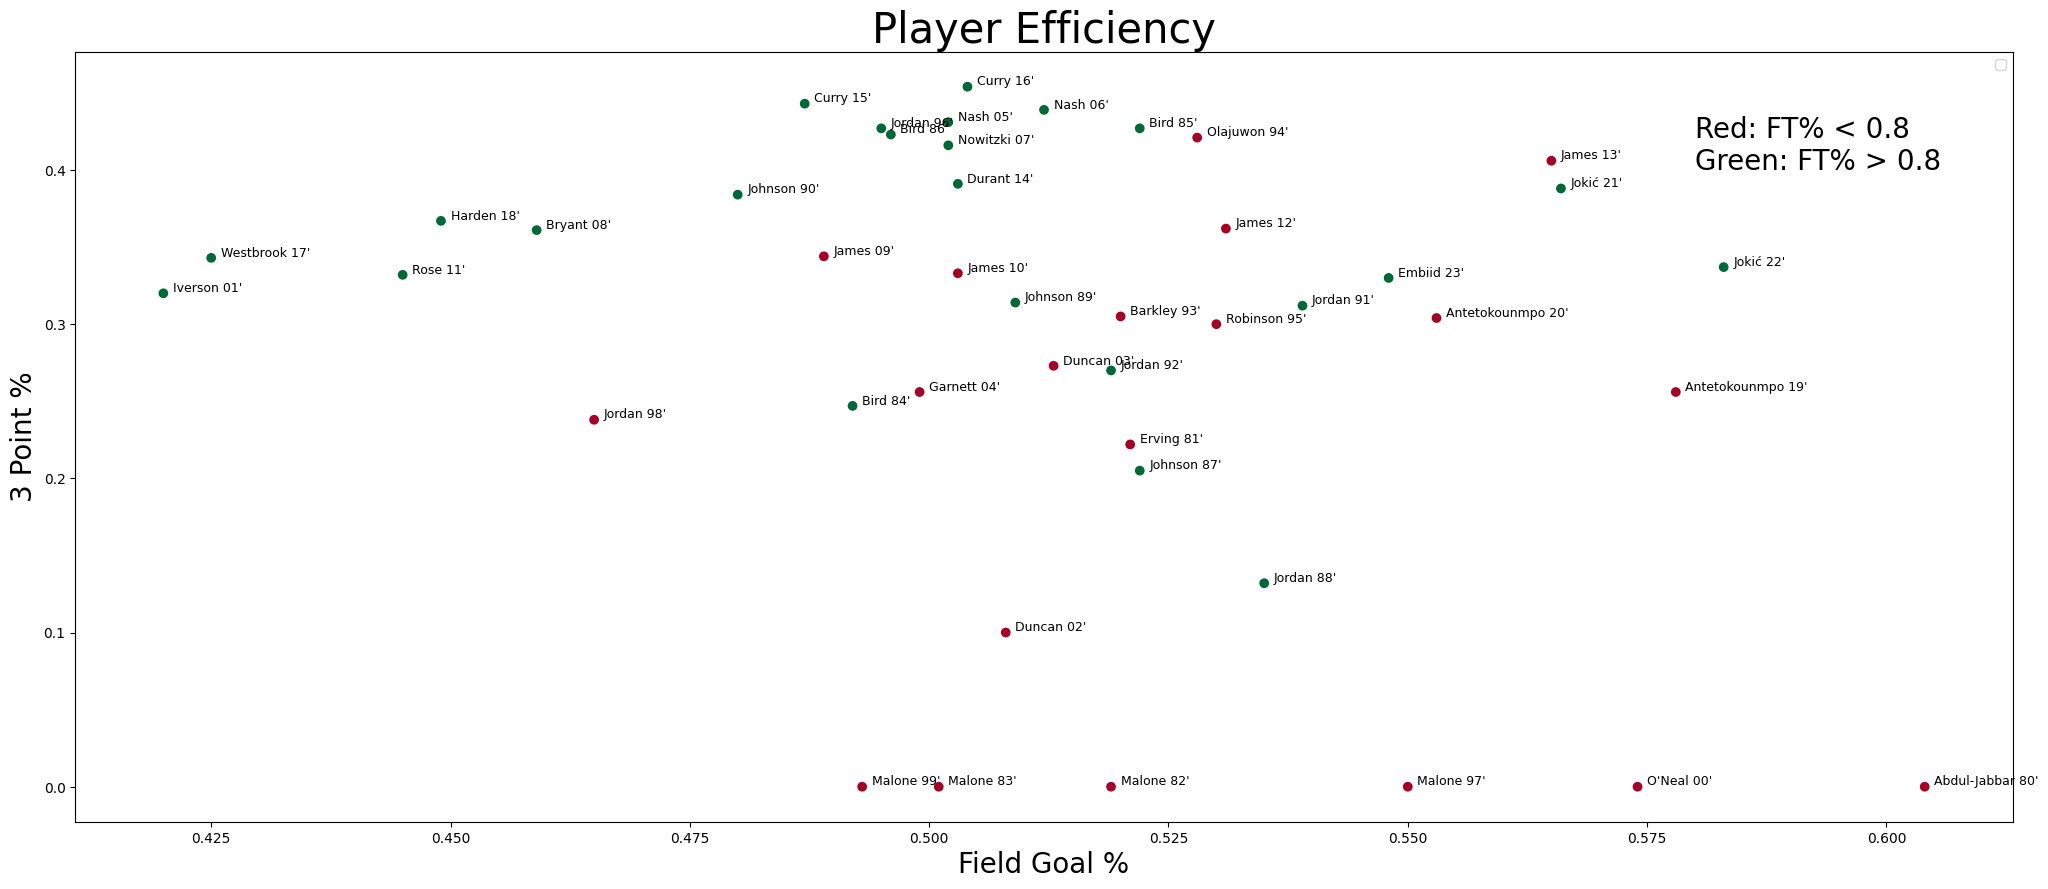

In [133]:
# Function to color points based on freethrow % 
def color_ftpct(percentage):
    if percentage>0.8:
        return 1
    else: 
        return 0
colors=[color_ftpct(percentage) for percentage in MVP['FT%']]

# Create plot
fig, ax=plt.subplots(ncols=1,figsize=(25,10))

# Colours scatterplot by FT%
plt.scatter(MVP['FG%'], MVP['3P%'], c=colors, cmap='RdYlGn')

# Adds player/season labels 
for i, player in enumerate(MVP.index):
    plt.annotate(player, (MVP['FG%'][i]+0.001, MVP['3P%'][i]+0.001), fontsize=9)

# Adds labels to plot
plt.xlabel("Field Goal %", fontsize=20)
plt.ylabel("3 Point %", fontsize=20)
plt.title("Player Efficiency", fontsize=30)
plt.legend()
plt.text(0.58, 0.4, 'Red: FT% < 0.8\nGreen: FT% > 0.8', fontsize=20)

# Passing, Rebounding, and Advanced Analytics

Highest Assist Season: Johnson 89'


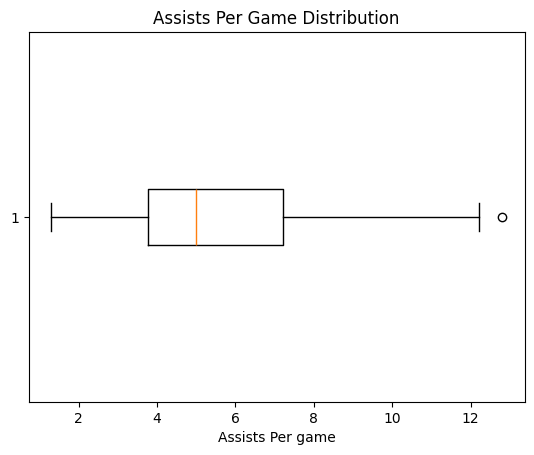

In [157]:
# Upon visualizing the boxplot of assists, there is one clear outlier of a season
plt.boxplot(MVP['AST'], vert=False)
plt.title("Assists Per Game Distribution")
plt.xlabel("Assists Per game")

# Finding and outputting the outlier season 
max_ast = np.argmax(MVP['AST'])
top_ast_ssn=MVP.iloc[max_ast]
contenders.append(top_ast_ssn)
print(f'Highest Assist Season: {top_ast_ssn.Keys}')

# Text Visualization

In [ ]:
# word cloud from frequency
import multidict as multidict
from wordcloud import WordCloud

fullTermsDict = multidict.MultiDict()
for i in range(len(topWords)):
    fullTermsDict.add(topWords[i][0],topWords[i][1])
    
wc = WordCloud(background_color="white")
# generate word cloud
wc.generate_from_frequencies(fullTermsDict)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Conclusion 